<a href="https://www.kaggle.com/code/marcinrutecki/standardize-or-normalize-ultimate-answer?scriptVersionId=119722970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">📏 Standardize or Normalize - Ultimate Answer 📏</div>

In [1]:
from IPython.display import Image
# https://unsplash.com/photos/iUfusOthmgQ

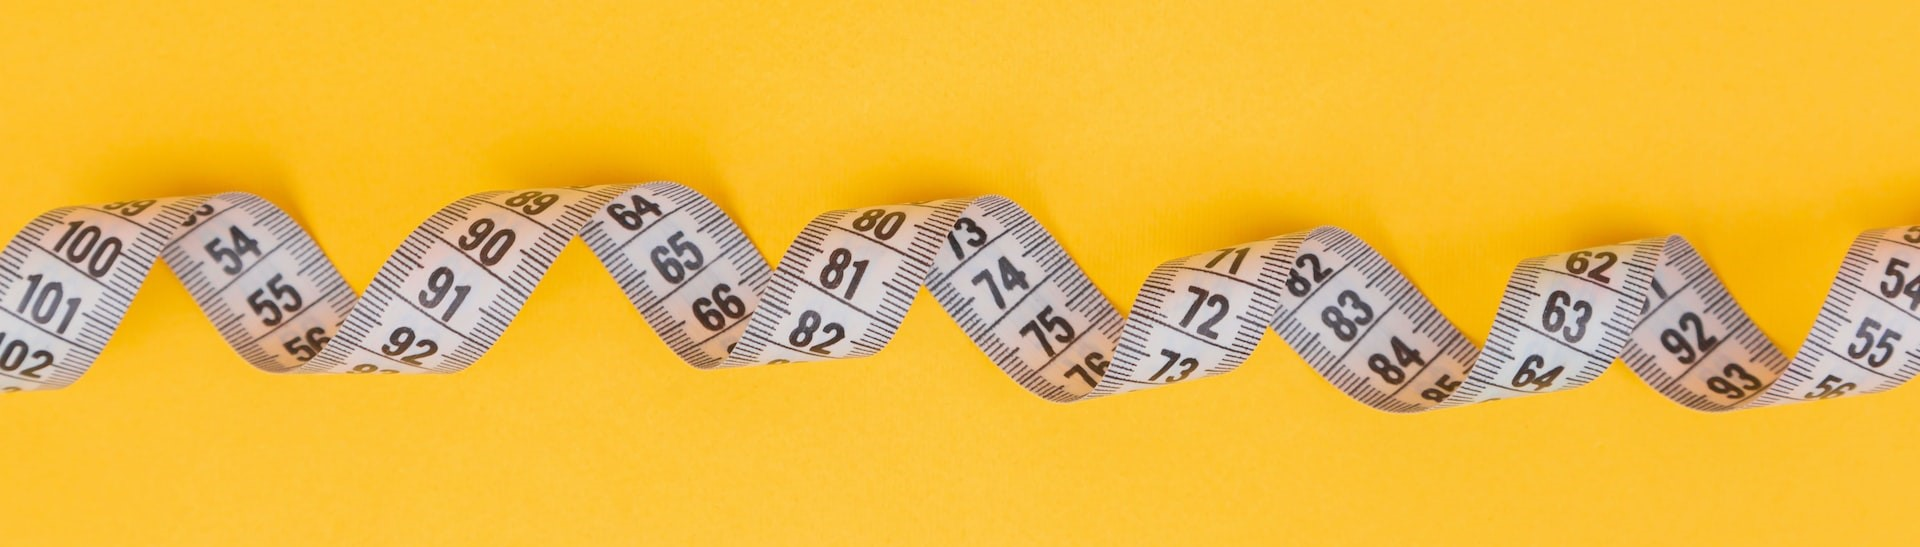

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents</div>

<a id="toc"></a>
- [1. Introduction](#1)
    - [1.1 Important questions](#1.1)
    - [1.2 Feature scaling Vs different machine learning algorithms](#1.2)
    - [1.3 Normalization/standardization before or after train-test split?](#1.3)
    - [1.4 Is it necessary to scale the target value?](#1.4)
    - [1.5 Should we delete outliers before scaling?](#1.5)
    - [1.6 Best practices](#1.6)
- [2. Set-up](#2)
    - [2.1 Import Libraries](#2.1)
    - [2.2 Import Data](#2.2)
    - [2.3 Data Set Characteristics](#2.3)
- [3. Data preprocessing](#3)
    - [3.1 Dealin with missing values in TotalCharges](#3.1)
    - [3.2 Dealing with duplicate values](#3.2)
    - [3.3 Creating numerical and categorical lists](#3.3)
    - [3.4 Feature scaling](#3.4)
- [4. Different scalers and common misconceptions](#4)
    - [4.1 MinMaxScaler normalization](#4.1)
        - [4.1.1 MinMax Scaler - when to use?](#4.1.1)
    - [4.2 StandardScaler standardization](#4.2)
    - [4.3 Is it valid to standardize variables with non-normal distribution?](#4.3)
    - [4.4 RobustScaler standardization](#4.4)
- [5. Outliers (and highly skewed data)](#5)
- [6. One more example (and comparison)](#6)
    - [6.1 Is it always better to use the RobustScaler?](#6.1)
- [7. My other notebooks)](#7)
- [6. References](#6)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Introduction - The Scale of Your Data Matters</div>

The more I’m involved in machine learning, the more I'm convinced that a deep understanding of what we are doing during data preprocessing highly affects the outcome.

Data transformation is one of the fundamental steps in the part of data processing. The primary reason we standardize or normalize variables is to make the features comparable by bringing them to the same scale. Very often our dataset contains features highly varying in magnitudes, units and range. Using the original scale may put more weights on the variables with a large range. This is highly undesirable.

Desirable outcome:
1. numerical features are scaled to a standard range;
2. the scaling process allows the algorithm to give equal weights to the variables.


<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>In essence:</b>
the terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things.
<li>the result of standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively. Standardization is not bounded by range;
<li>the result of normalization (using MinMaxScaler) is always in a range of [0,1] or [-1,1] if there are negative values. 
</div>

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Important questions</span></b>

I will try to answer all important questions related to the process of scaling variables like:
1. Does StandardScaler really assume Gaussian distribution and what are the consequences?
2. Is it valid to standardize variables with non-normal distribution?
3. What are the drawbacks and common misconceptions of standardizing and normalizing process?
4. Which technique is better? Should I normalize or standardize?
5. Is RobustScaler really robust and always the best choice?

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Feature scaling Vs different machine learning algorithms</span></b>

The difference in scale for input variables does not affect all machine learning algorithms. Some of them are sensitive to feature scaling while others are not.

* **Gradient Descent Algorithm**

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled.

* **Distance Based-Algorithm**

Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because they are using distances between data points to determine their similarity.

* **Tree-based algorithms** are more robust to the scale of the features. 

Scaling is critical, while performing **Principal Component Analysis(PCA)**. PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.



<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Normalization/standardization before or after train-test split?</span></b>

We should never forget that the testing data set represents real-world data. So normalize or standardize always AFTER splitting data. If you standardize (take the mean and variance of the whole dataset) before splitting, you'll introduce future information into the training explanatory variables (i.e. the mean and variance).

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Is it necessary to scale the target value?</span></b>

Scaling the target value is a good idea in regression modelling. Scaling of the data makes it easy for a model to learn and understand the problem.

"A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable."

[Neural Networks for Pattern Recognition (Advanced Texts in Econometrics](https://www.amazon.com/Networks-Recognition-Advanced-Econometrics-Paperback/dp/0198538642/ref=as_li_ss_tl?ie=UTF8&qid=1540160671&sr=8-2&keywords=Neural+Networks+for+Pattern+Recognition&linkCode=sl1&tag=inspiredalgor-20&linkId=991aca4ff0fc6769d5dad40a86092458&language=en_US)

— Page 298, Neural Networks for Pattern Recognition, 1995.

<a id="1.5"></a>
## <b>1.5 <span style='color:#E1B12D'>Should we delete outliers before scaling?</span></b>

Including outliers in data driven models could be risky. The existence of an extreme single misleading value has the potential to change the conclusion implied by the model. It is therefore important to manage that kind of risk.

**So delete or not delete?**

Well it depends. Especially when a data set is highly imbalanced, deleting outliers could possibly be very undesirable, because by doing that we can drop important data.

After dropping outliers we should always check what we have done. Sometimes we should definitely keep the outliers in a dataset.

Take a look at this notebook:
* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)

By deleting outliers we dropped about **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">40%</mark>** of the very important data in that case! **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">We shouldn't do that!</mark>**

When the data is balanced we should consider deleting outliers.

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with outliers</mark>**: [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)

<a id="1.6"></a>
## <b>1.6 <span style='color:#E1B12D'>Best practices</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul> 
<li> It’s usually a bad idea to train machine learning models on features with vastly different scales.
<li> Consider deleting outliers before scaling a data, but be very careful when a data is highly imbalanced.
<li> Some machine learning algorithms are sensitive to feature scaling (gradient descent, distance based) while others are not (tree-based).
<li> Normalize or standardize always AFTER splitting data (of course you need to apply normalization/standardization to test data as well).
<li> StandardScaler, MinMaxScaler and RobustScaler will not affect data distribution (the algorithms don't enforce a normal distribution).

<li> Normalisation does not treat outliers well (MinMax Scaler shrinks the data within the given range which will affect the ability of the algorithm to give adequate weights for the features).
<li> MinMaxScaler can be used when the upper and lower boundaries are well known from domain knowledge.

<li> Standardization allows better handling of the outliers and better facilitates convergence of features (which is important for the gradient descent and distance based algorithms).
<li> StandardScaler is also sensitive to outliers (less than MinMaxScaler, but still sensitive). The mean and standard deviation are highly affected by outliers so the distance (measured in standard deviation) is also affected by outliers - the algorithm will scale most of the data to a small interval.
<li> RobustScaler's results are not skewed by outliers and the spread represents REAL distance.
<li> RobustScaler's deliberate exclusion of certain data can limit the overall amount of information that is used to make predictions, leading to lower confidence of the result.
<li> In my opinion there are no possible issues with standardizing non-normal distribution. 

<li> You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

***   

<b>I usually prefer standardization over normalization. 
    
I would take advantage of StandardScaler if:

* I decide to delete outliers or they are not present in a data set;
* when the data is not very highly skewed.

I would use RobustScaler in opposite situations and MinMaxScaler only in a very special cases.

</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Set-up</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#E1B12D'>Import Libraries</span></b>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

<a id="2.2"></a>
## <b>2.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [4]:
try:
    raw_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
except:
    raw_df = pd.read_csv('telco.csv')

<a id="2.3"></a>
## <b>2.3 <span style='color:#E1B12D'>Data Set Characteristics</span></b>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents.

The are no missing values in data set.

In [5]:
palette = ['#008080','#FF6347', '#E50000', '#D2691E'] # Creating color palette for plots

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Data preprocessing</div>

We don't need a customerID column, so I'll delete it.

In [6]:
df = raw_df.drop('customerID', axis=1)

<a id="3.1"></a>
## <b>3.1 <span style='color:#E1B12D'>Dealin with missing values in TotalCharges</span></b> 

In [7]:
 # df['TotalCharges'] = df['TotalCharges'].astype(float)

An error occured when trying to execule a code above: could not convert string to float: ''

The string to be converted must not contain any characters or symbols. The error occurs due to the incorrect initialization of value to a string variable.

We have probably empty strings in 'TotalCharges' colums, but as they were defined as string, they didn't appear as Null Values.

In [8]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


We coud try to impute the missing values by building a model for that reason or fill them using some often used values in that kind of situations e.g. mean, median or mode, but it's simpler (and probably better) to just drop the coresponding rows from a dataset as the numbers of empty string is very low (11).

In [9]:
df = df.drop(step2, axis = 0).reset_index(drop=True) # Dropping rows with no values in 'Total_charges'

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Finally we can convert string to float in 'Total_charges' column

<a id="3.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Dealing with duplicated values</span></b> 

In [11]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [12]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Creating numerical and categorical lists</span></b> 

In [13]:
# distinction is based on the number of different values in the column
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding target:'Churn'

<a id="3.4"></a>
## <b>3.4 <span style='color:#E1B12D'>Feature scaling</span></b>

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Creating functions for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def MinMax_Scaler (df, col_names):
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def Robust_Scaler (df, col_names):
    features = df[col_names]
    scaler = RobustScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [15]:
col_names = numeric_columns
df_ss = df.copy()
df_ss = Standard_Scaler (df_ss, col_names)

In [16]:
df_mm = df.copy()
df_mm = MinMax_Scaler (df_mm, col_names)

In [17]:
df_rs = df.copy()
df_rs = Robust_Scaler (df_rs, col_names)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Different scalers and common misconceptions
</div>

<a id="4.1"></a>
## <b>4.1 <span style='color:#E1B12D'> MinMaxScaler normalization</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
MinMaxScaler formula:

$x' =  \frac {x − min(x)}{max(x)-min(x)}$
</div>

This technique is used to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value gets transformed into 0 and the maximum value gets transformed into 1.

In many sources we can read that normalization is used when the data doesn't have Gaussian distribution whereas Standardization is used on data having Gaussian distribution. Personally, I am skeptical about this idea.

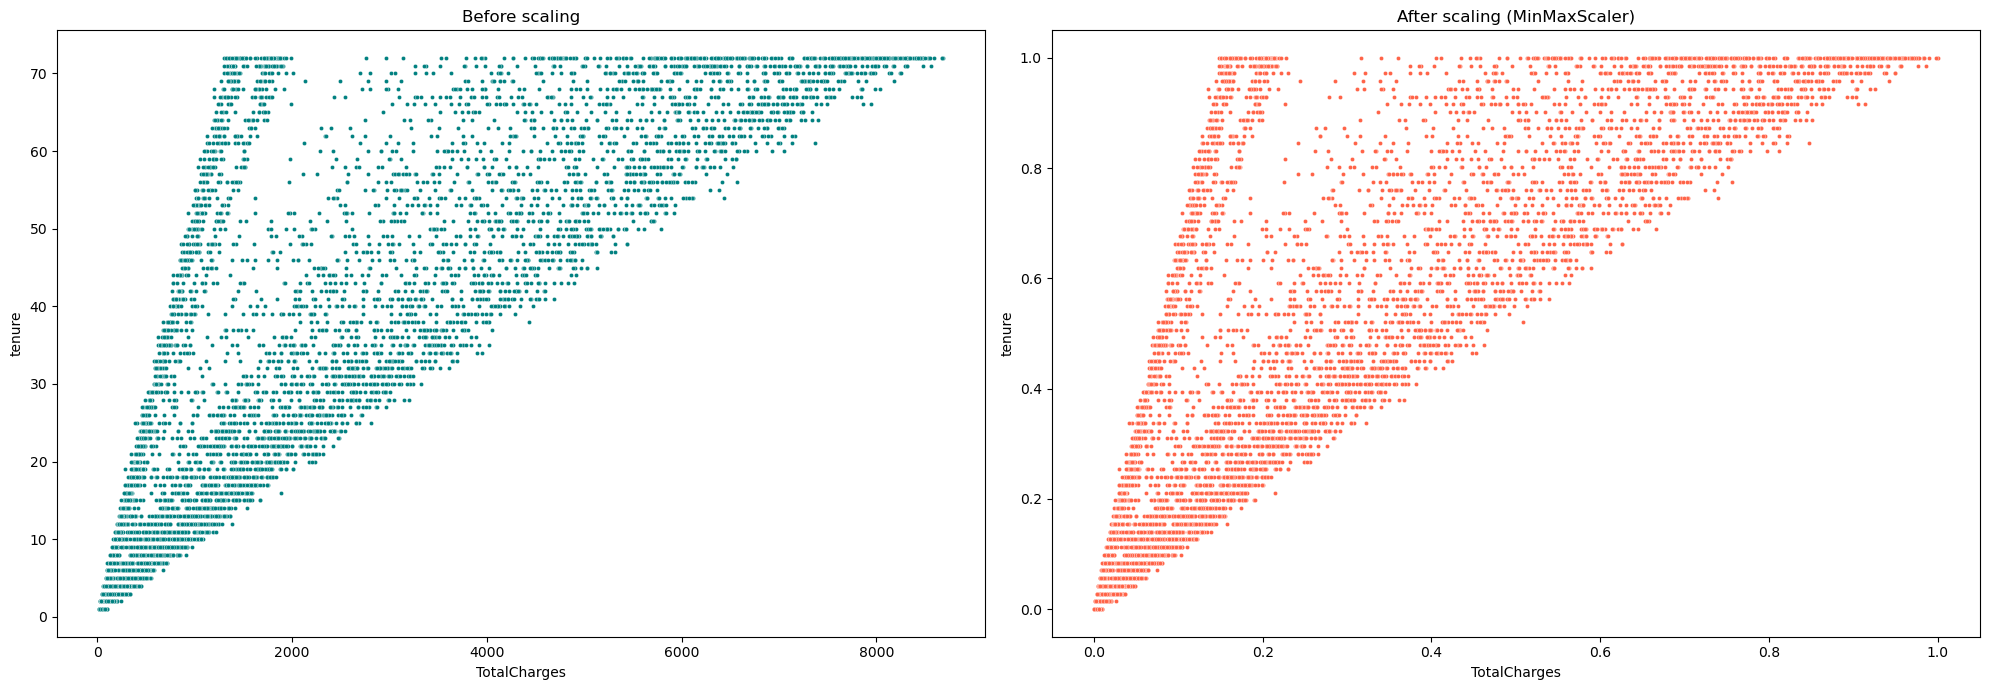

In [18]:
fig = plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df, x= "TotalCharges", y="tenure",color='#008080', s=9)
ax.set(title = "Before scaling")

plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_mm, x= "TotalCharges", y="tenure",color='#FF6347', s=9)
ax.set(title = "After scaling (MinMaxScaler)")

plt.tight_layout()
plt.show()

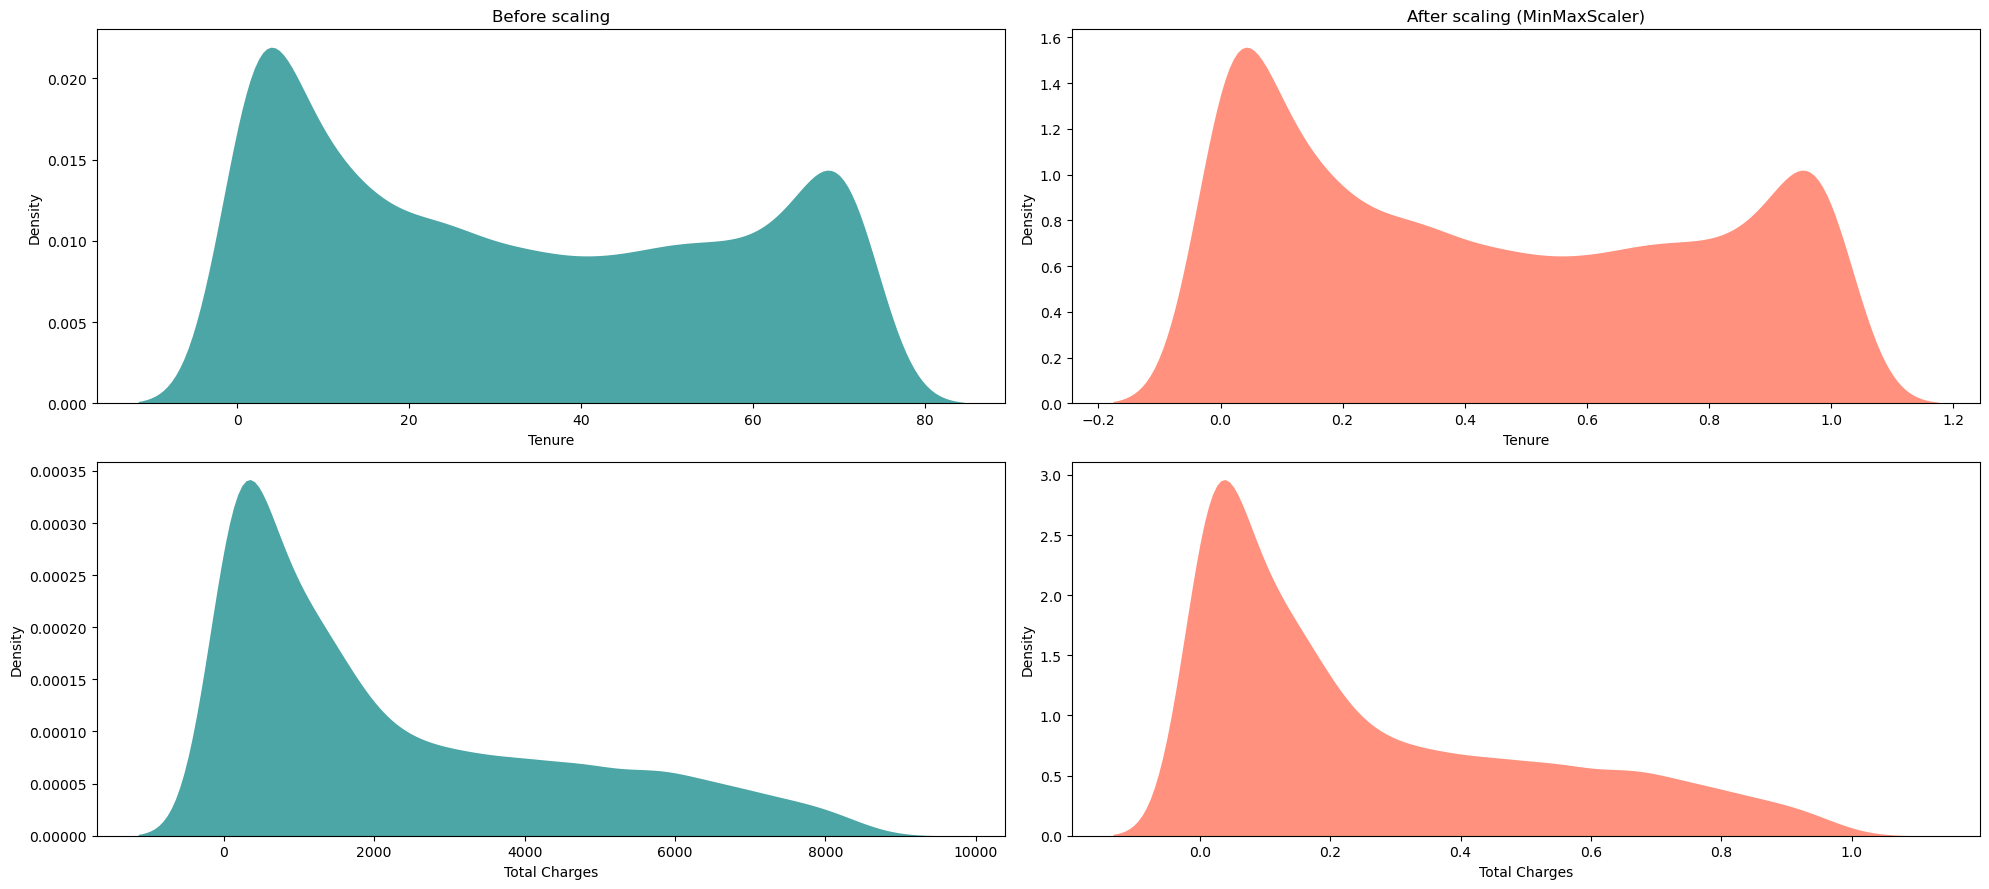

In [19]:
fig = plt.figure(figsize = (20,9))

plt.subplot(2,2,1)
ax = sns.kdeplot(df["tenure"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set(title = "Before scaling")
ax.set_xlabel('Tenure')

plt.subplot(2,2,2)
ax = sns.kdeplot(df_mm["tenure"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set(title = "After scaling (MinMaxScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,2,3)
ax = sns.kdeplot(df["TotalCharges"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.subplot(2,2,4)
ax = sns.kdeplot(df_mm["TotalCharges"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.tight_layout()
plt.show()

From the above plots we can understand that the distributions after MinMaxScaler remain intact, but the scales have changed (as expected).

<a id="4.1.1"></a>
#### <b>4.1.1 <span style='color:#E1B12D'>MinMax Scaler - when to use?</span></b>

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.  A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB colour range).

<a id="4.2"></a>
## <b>4.2 <span style='color:#E1B12D'> StandardScaler standardization</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
StandardScaler formula:

$x' = \frac {x-μ}{σ}$

μ - mean

σ - standard deviation
</div>

In many places on the Internet you can read that StandardScaler assumes that the data follows a Gaussian distribution. We usually draw a conclusion from that statement that we shouldn't take advantage of StandardScaler when a data is not normally distributed. In my opinion this is not true. StandardScaler will provide the best results when data is normally distributed  - that is a fact, but the same statement is valid also for MinMax Scaler. And it doesn’t necessarily mean that we cannot standardize non normal data. Let's take a look at the charts.

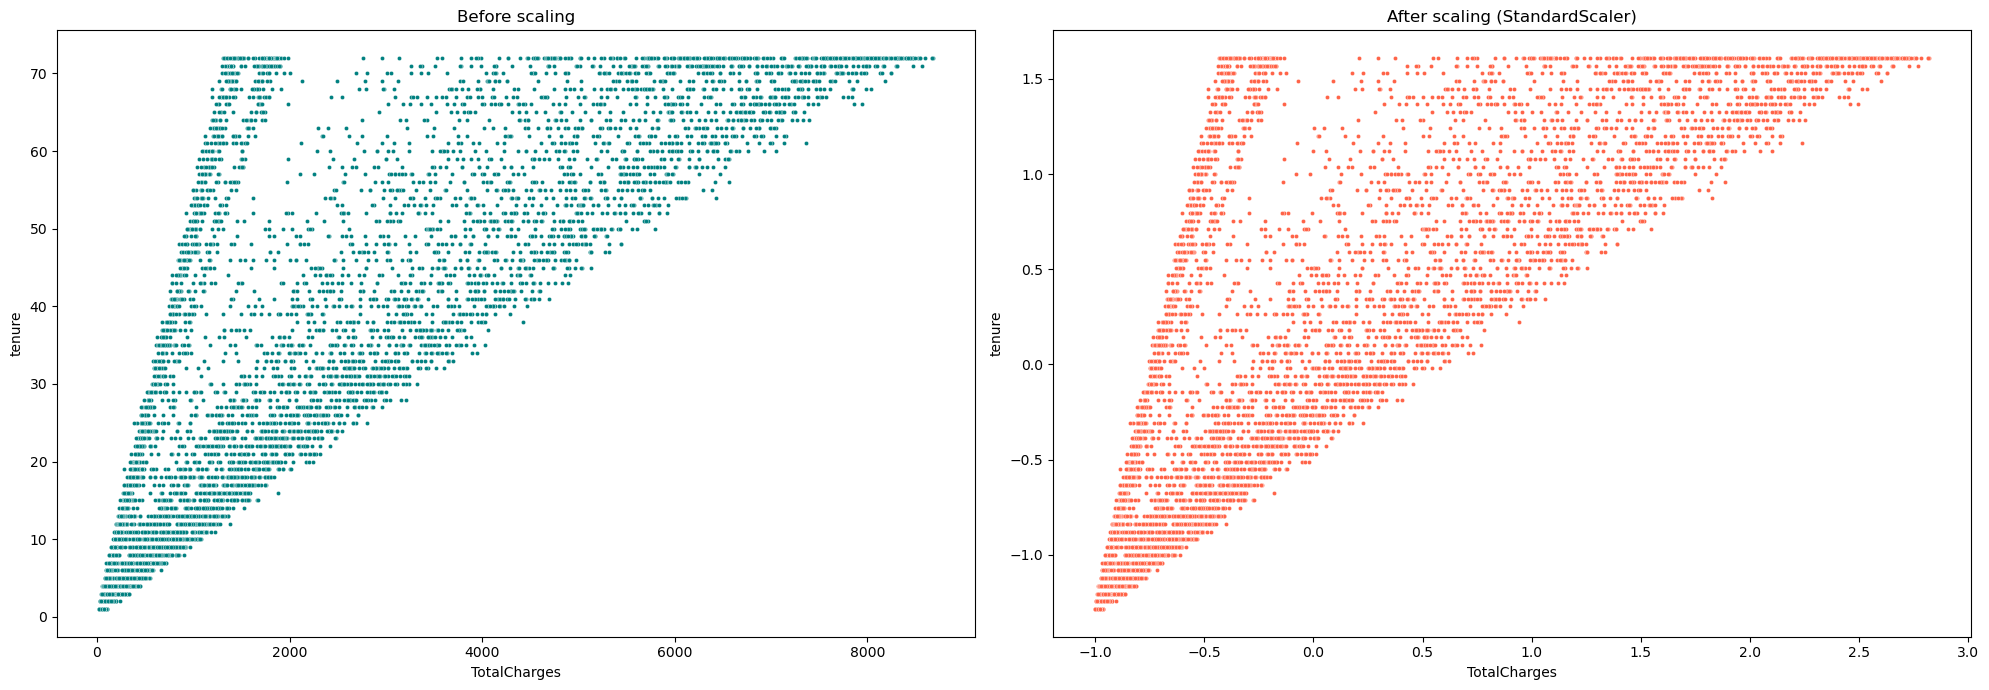

In [20]:
fig = plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df, x= "TotalCharges", y="tenure",color='#008080', s=9)
ax.set(title = "Before scaling")

plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_ss, x= "TotalCharges", y="tenure",color='#FF6347', s=9)
ax.set(title = "After scaling (StandardScaler)")

plt.tight_layout()
plt.show()

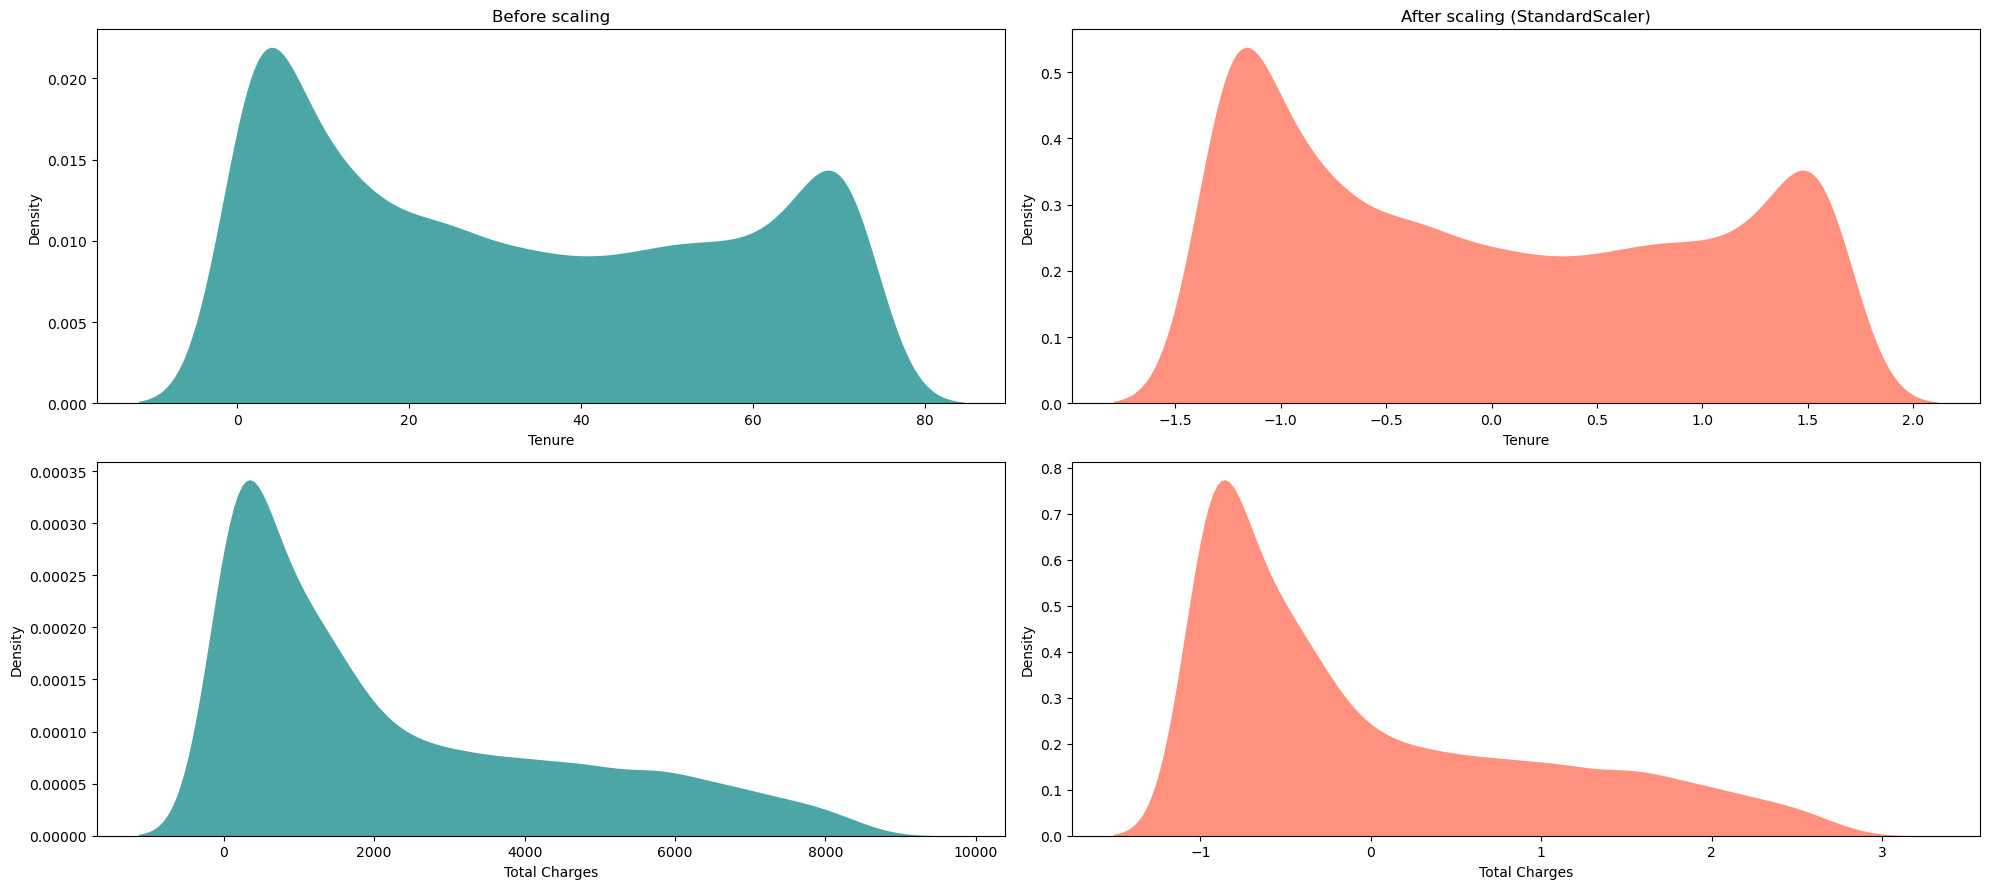

In [21]:
fig = plt.figure(figsize = (20,9))

plt.subplot(2,2,1)
ax = sns.kdeplot(df["tenure"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set(title = "Before scaling")
ax.set_xlabel('Tenure')

plt.subplot(2,2,2)
ax = sns.kdeplot(df_ss["tenure"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set(title = "After scaling (StandardScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,2,3)
ax = sns.kdeplot(df["TotalCharges"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.subplot(2,2,4)
ax = sns.kdeplot(df_ss["TotalCharges"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.tight_layout()
plt.show()

From the above scatter plots and KDE plots we can see that the data distributions remain the same after applying StandardScaler. Only the scale changes. No matter if the data is normally distributed or not.

<a id="4.3"></a>
## <b>4.3 <span style='color:#E1B12D'> Is it valid to standardize variables with non-normal distribution?</span></b>

Once again it is worth highlighting: StandardScaler will not affect data distribution. If you thought it was transforming the distribution of the data, you need to get out of that concept. It's important to keep in mind that StandardScaler only standardizes the features in the data, it does not enforce a normal distribution.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li>In my opinion there are no possible issues with standardizing non-normal distribution. In other words, if the features do not follow a normal distribution before standardization, they will not follow it after the standardization either (the distribution will remain exactly the same - only the scale will change). So, it’s valid to do it on a non-normal distribution.
    
<li>Standardization also does not assume anything about the distribution of variables (normal or other).

<li>Go ahead and standardize the variables (if required) without worrying about the distribution!
<li>But be careful when a data is highly skewed or have significant outliers (topic discussed later)!

</div>

<a id="4.4"></a>
## <b>4.4 <span style='color:#E1B12D'>RobustScaler standardization</span></b>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
RobustScaler formula:

$x' =  \frac {x − median(x)}{IQR}$

IQR - describes the middle 50% of values when ordered from lowest to highest (IQR = Q3 – Q1).

The scaled values will have their median and IQR set to 0 and 1, respectively.
</div>

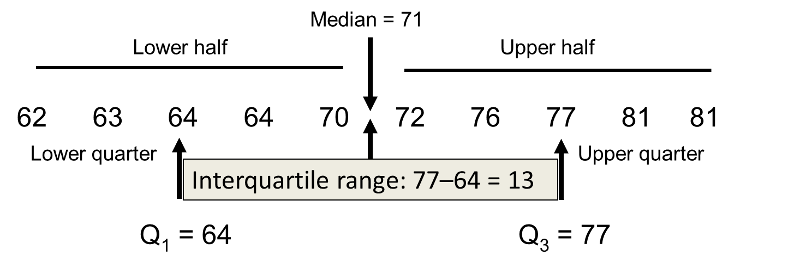

Different approach to standardizing input variables in the presence of outliers is to ignore them from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

Unlike the previous scalers, the centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar.

The resulting variable is not skewed by outliers and the outliers are still present with the same relative relationships to other values.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
<li> StandardScaler uses mean and standard deviation. RobustScaler uses median and interquartile range (IQR) instead.
<li> Outliers can significantly alter the mean, but don't affect the median. That’s because the median doesn’t depend on every value in the list. 
</div>

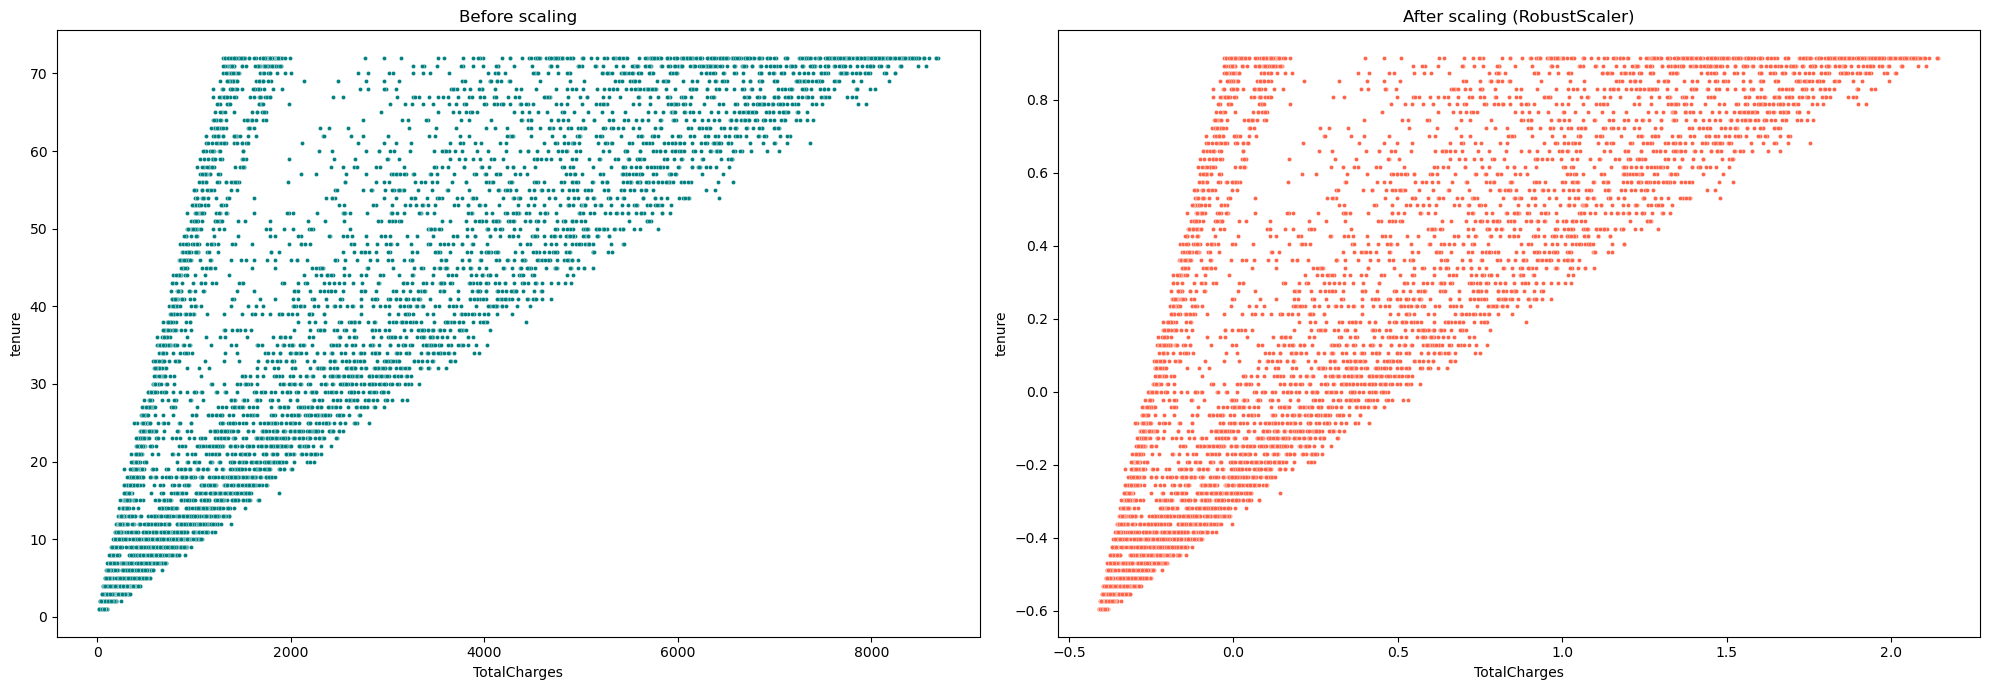

In [22]:
fig = plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df, x= "TotalCharges", y="tenure",color='#008080', s=9)
ax.set(title = "Before scaling")

plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_rs, x= "TotalCharges", y="tenure",color='#FF6347', s=9)
ax.set(title = "After scaling (RobustScaler)")

plt.tight_layout()
plt.show()

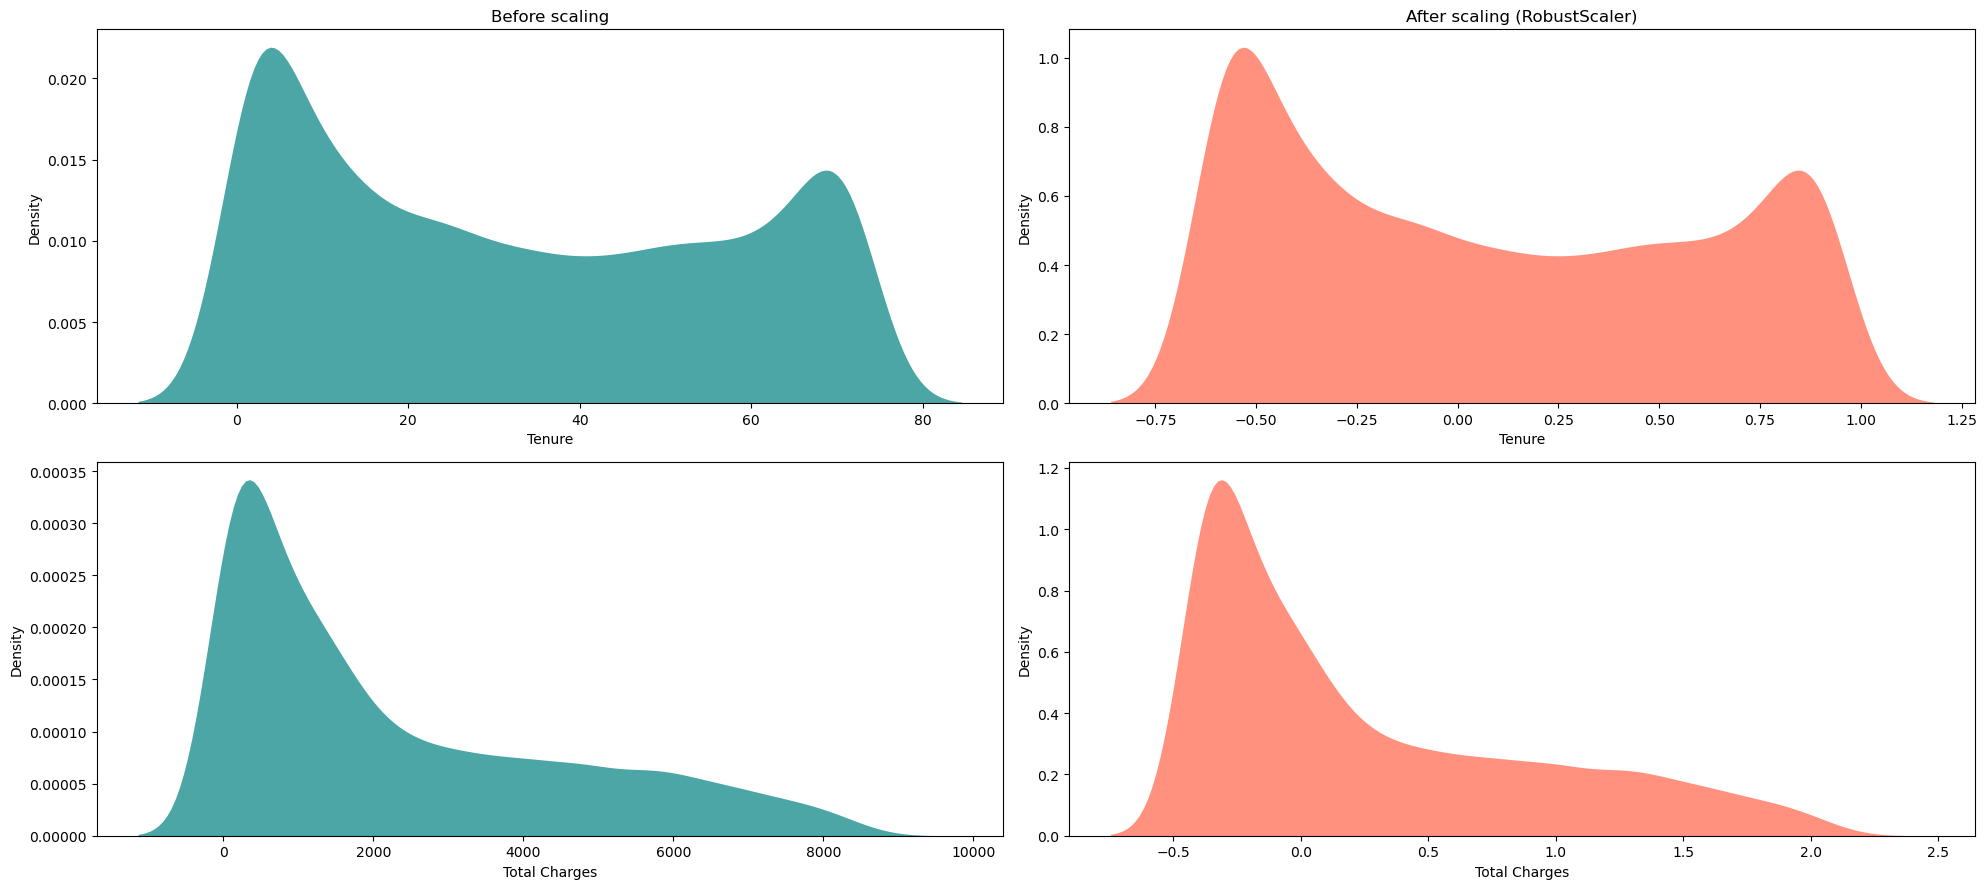

In [23]:
fig = plt.figure(figsize = (20,9))

plt.subplot(2,2,1)
ax = sns.kdeplot(df["tenure"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set(title = "Before scaling")
ax.set_xlabel('Tenure')

plt.subplot(2,2,2)
ax = sns.kdeplot(df_rs["tenure"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set(title = "After scaling (RobustScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,2,3)
ax = sns.kdeplot(df["TotalCharges"], color='#008080', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.subplot(2,2,4)
ax = sns.kdeplot(df_rs["TotalCharges"], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.set_xlabel('Total Charges')

plt.tight_layout()
plt.show()

Once again - the distributions after RobustScaler remain intact and outliers ARE still present!

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Outliers (and highly skewed data)</div>

Min-max normalization has a significant downside: it does not handle skewed data and outliers very well. For example, if you have 99 values between 0 and 40, and one value is 100, then the 99 values will all be transformed to a value between 0 and 0.4! As a result, if you have outliers in your features (columns), normalizing your data will scale most of the data to a small interval. Standardisation is more robust to outliers.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
MinMax Scaler shrinks the data within the given range which will affect the ability of the algorithm to give adequate weights for the features. The result looks valid - it looks like all our features have the same scale, but in reality the scale after transformation is not equal for them because the presence of outliers kills that idea!
</div>

Consider also that: according to scikit-learn documentation "both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers".
* [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

but RobustScaler is much better:
* [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
It is important to remember that MinMAxScaler, StandardScaler and RobustScaler will not remove the outliers from a data set. We can say that standardization is more robust to outliers than normalization (especially using RobustScaler), because of the scaling process that we’ve just seen. In other words - the outliers will still remain in the data set after standardization and normalization.
</div>

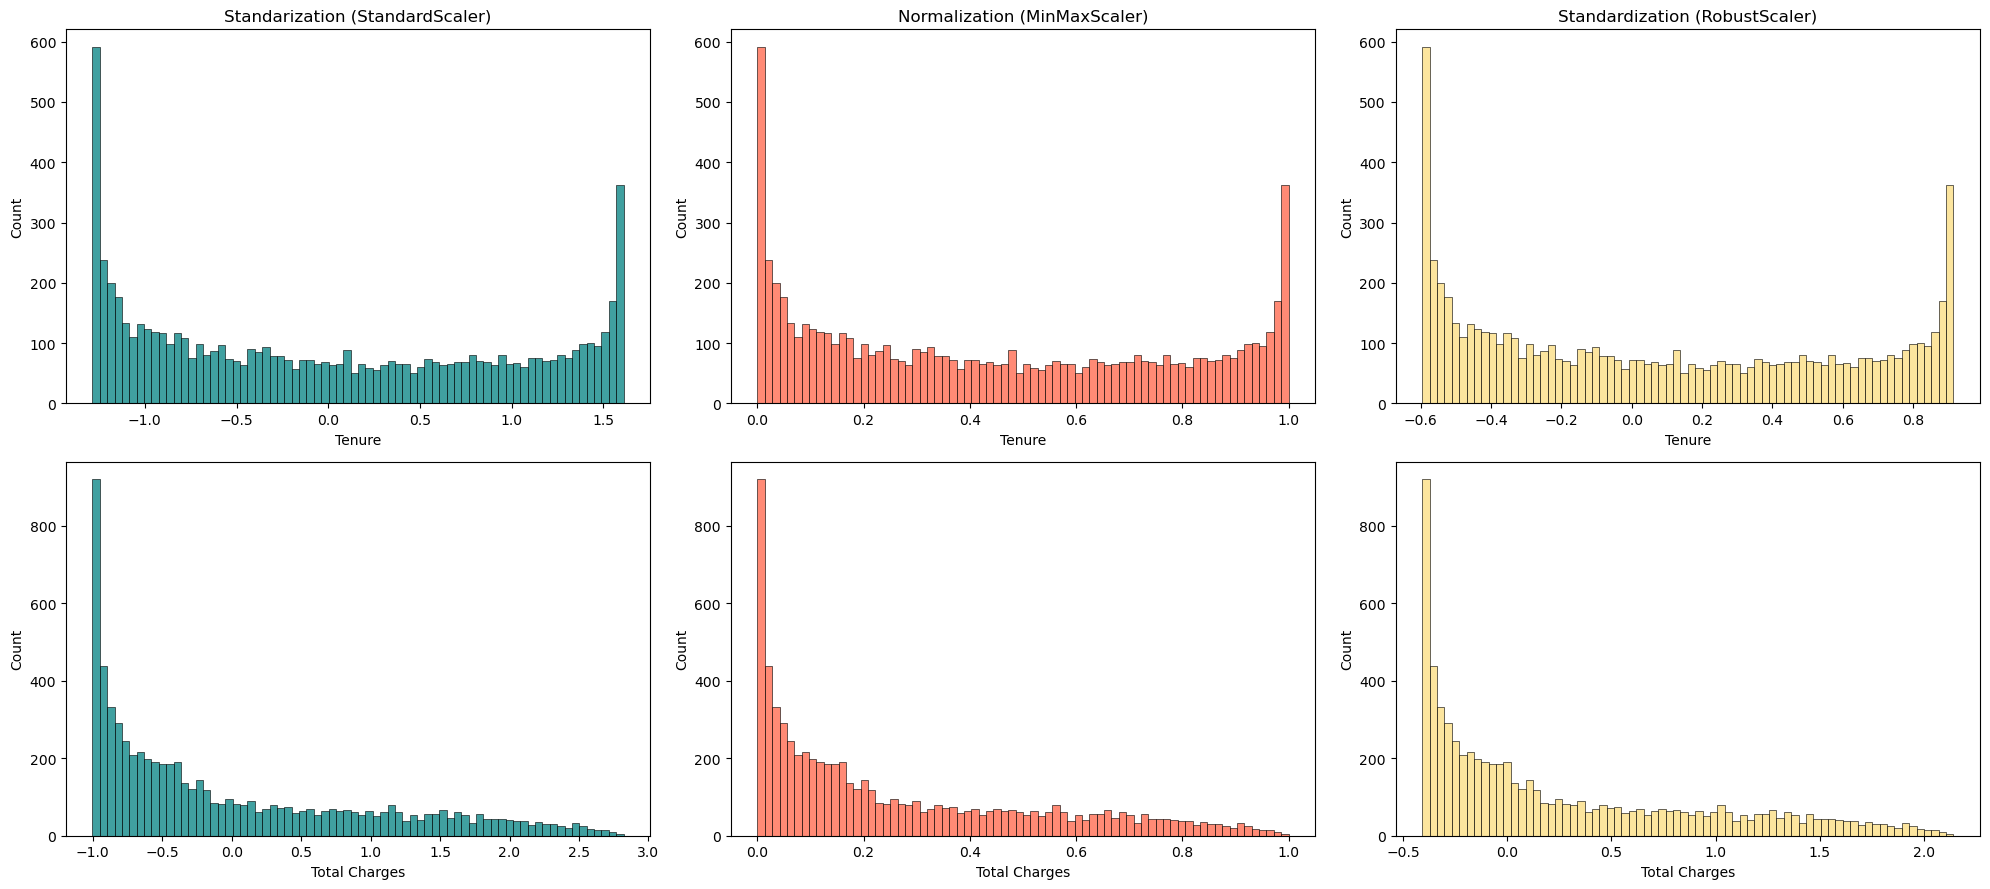

In [24]:
fig = plt.figure(figsize = (20,9))

plt.subplot(2,3,1)
ax = sns.histplot(df_ss["tenure"], color='#008080', bins=72)
ax.set(title = "Standarization (StandardScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,3,2)
ax = sns.histplot(df_mm["tenure"], color='#FF6347', bins=72)
ax.set(title = "Normalization (MinMaxScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,3,3)
ax = sns.histplot(df_rs["tenure"], color='#FBDD7E', bins=72)
ax.set(title = "Standardization (RobustScaler)")
ax.set_xlabel('Tenure')

plt.subplot(2,3,4)
ax = sns.histplot(df_ss["TotalCharges"], color='#008080', bins=72)
ax.set_xlabel('Total Charges')

plt.subplot(2,3,5)
ax = sns.histplot(df_mm["TotalCharges"], color='#FF6347', bins=72)
ax.set_xlabel('Total Charges')

plt.subplot(2,3,6)
ax = sns.histplot(df_rs["TotalCharges"], color='#FBDD7E', bins=72)
ax.set_xlabel('Total Charges')

plt.tight_layout()
plt.show()

* After scaling features we can see that outcome is different nor MinMaxScaler and StandardScaler! 'TotalCharges' variable is highly skewed and it's represented in scale after standarization. 
* When we compare 'Tenure' with 'TotalCharges' we can see the difference in scale, but after normalization (MinMax scaler) the difference is gone - both variables are distributed between 0 and 1. This is important and not desirable!
* Note in particular that because the values on each feature have different magnitudes, the spread of the transformed data on each feature is different also after standardization! It could be also problematic, but this is more real than forced transformation using MinMaxScaler.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
In clustering analyses standardization may be especially crucial in order to compare similarities between features based on distance measures. Another example is the Principal Component Analysis (PCA), where we usually prefer standardization over Min-Max scaling because we are interested in the components that maximize the variance.

</div>

When the data is balanced we should consider deleting outliers.

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with outliers</mark>**: [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span> One more example (and comparison)</div>

Let's create a new data set: 60 random points from normal distribution with mean = 5 and standard deviation = 8

In [25]:
data = np.random.normal(5, 8, 60)
new_df = pd.DataFrame({"Data":data})

In [26]:
new_df.describe()

,Data
count,60.000000
mean,4.611243
std,8.555722
min,-15.266544
25%,-0.337972
50%,5.097672
75%,9.886338
max,24.621370


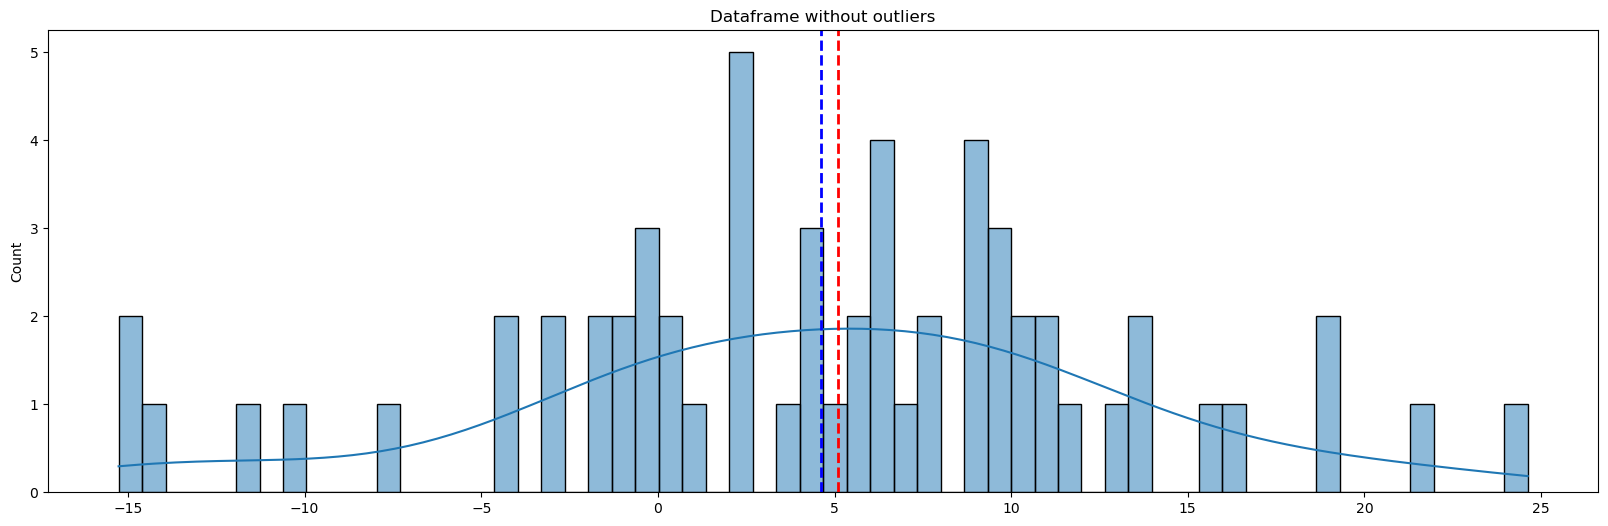

In [27]:
fig = plt.figure(figsize = (20,6))

ax = sns.histplot(new_df, color='#008080', kde=True, bins=60)
ax.set(title = "Dataframe without outliers")
ax.legend([],[], frameon=False)
ax.axvline(new_df['Data'].median(), color='red', ls='--', lw=2)
ax.axvline(new_df['Data'].mean(), color='blue', ls='--', lw=2)

plt.show()

Now we add a few outliers to our input list.

In [28]:
outliers = np.random.uniform(200, 150, 5)
out_df = pd.DataFrame({"Data": np.append(new_df, outliers)})

In [29]:
out_df.describe()

,Data
count,65.000000
mean,17.863335
std,47.057144
min,-15.266544
25%,-0.056211
50%,6.099647
75%,10.883563
max,194.421995


Outliers caused the mean to increase significantly! Median, however, increased by a minimal amount.

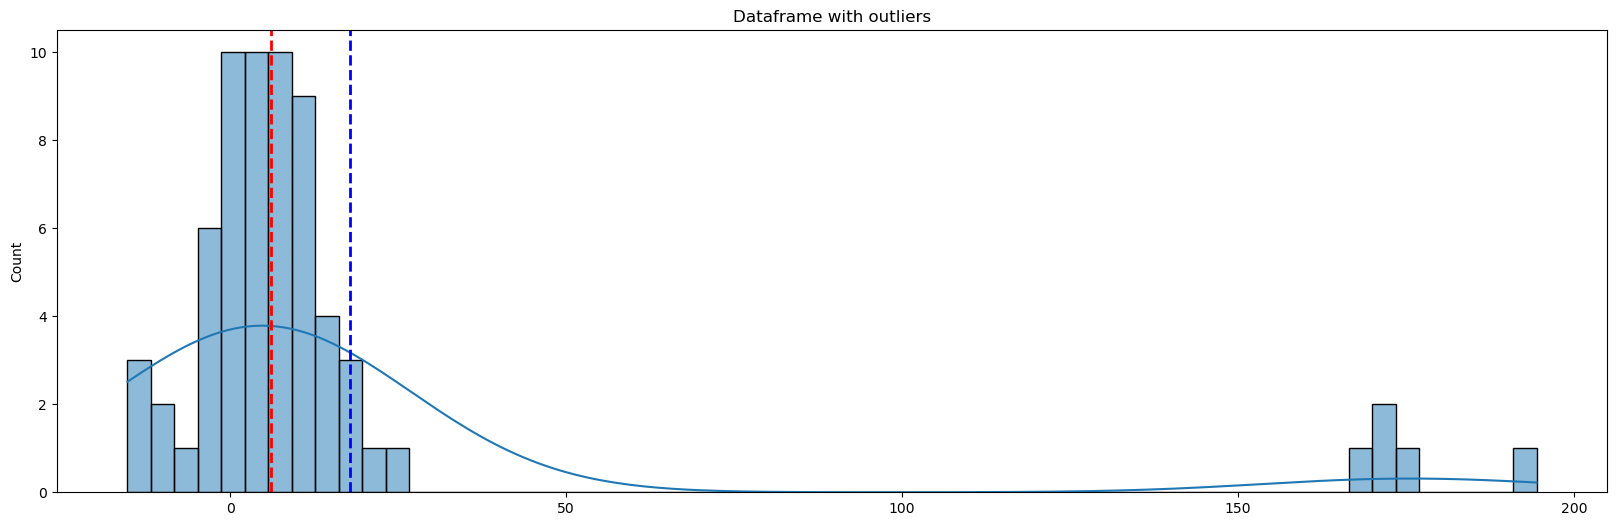

In [30]:
fig = plt.figure(figsize = (20,6))

ax = sns.histplot(out_df, color='#008080', kde=True, bins=60)
ax.set(title = "Dataframe with outliers")
ax.legend([],[], frameon=False)
ax.axvline(out_df['Data'].median(), color='red', ls='--', lw=2)
ax.axvline(out_df['Data'].mean(), color='blue', ls='--', lw=2)

plt.show()

In [31]:
col_names = out_df.columns

df_robust = out_df.copy()
df_stand = out_df.copy()
df_norm = out_df.copy()

df_robust = Robust_Scaler (df_robust, col_names)
df_stand = Standard_Scaler (df_stand, col_names)
df_norm = MinMax_Scaler (df_norm, col_names)

df_robust2 = new_df.copy()
df_stand2 = new_df.copy()
df_norm2 = new_df.copy()

df_robust2 = Robust_Scaler (df_robust2, col_names)
df_stand2 = Standard_Scaler (df_stand2, col_names)
df_norm2 = MinMax_Scaler (df_norm2, col_names)

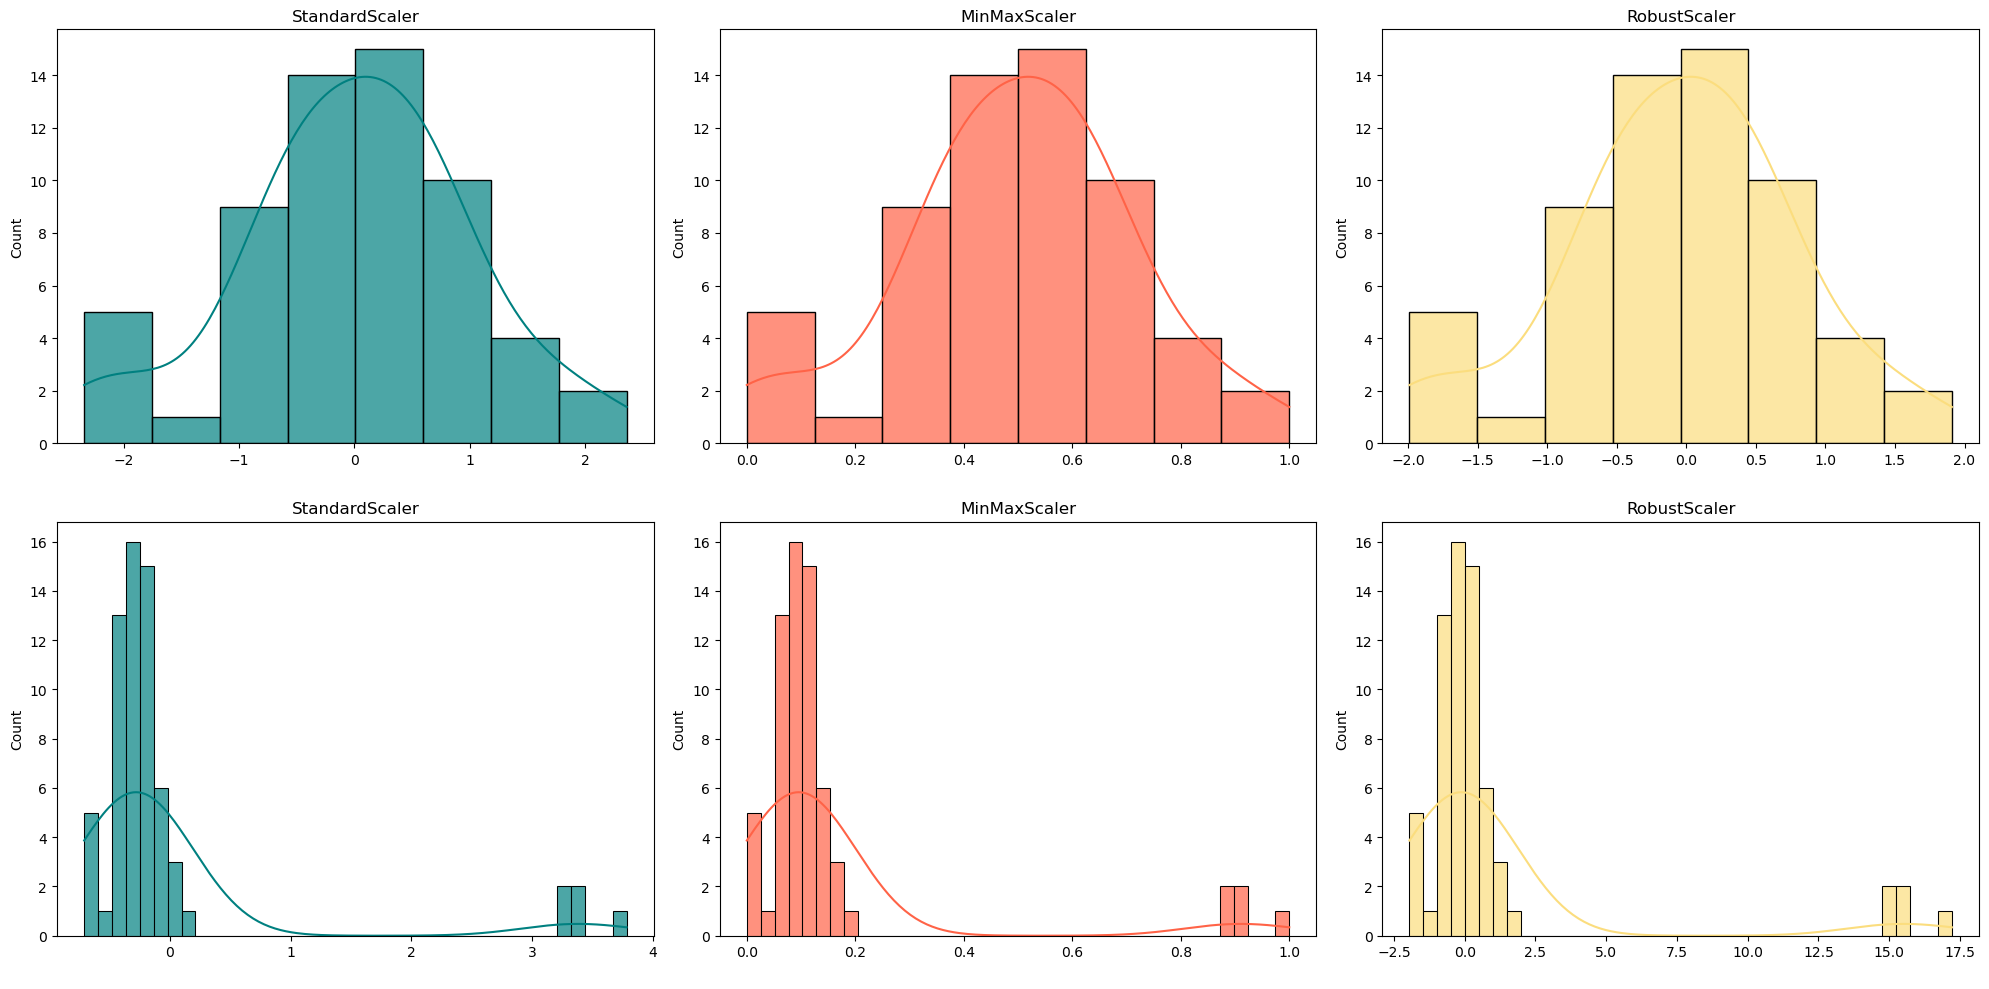

In [32]:
fig = plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
ax = sns.histplot(df_stand2["Data"], color='#008080', fill= True, alpha=.7, kde=True)
ax.set(title = "StandardScaler")
ax.set_xlabel(' ')

plt.subplot(2,3,2)
ax = sns.histplot(df_norm2["Data"], color='#FF6347', fill= True, alpha=.7, kde=True)
ax.set(title = "MinMaxScaler")
ax.set_xlabel(' ')

plt.subplot(2,3,3)
ax = sns.histplot(df_robust2["Data"], color='#FBDD7E', fill= True, alpha=.7, kde=True)
ax.set(title = "RobustScaler")
ax.set_xlabel(' ')

plt.subplot(2,3,4)
ax = sns.histplot(df_stand["Data"], color='#008080', fill= True, alpha=.7, kde=True)
ax.set(title = "StandardScaler")
ax.set_xlabel(' ')

plt.subplot(2,3,5)
ax = sns.histplot(df_norm["Data"], color='#FF6347', fill= True, alpha=.7, kde=True)
ax.set(title = "MinMaxScaler")
ax.set_xlabel(' ')

plt.subplot(2,3,6)
ax = sns.histplot(df_robust["Data"], color='#FBDD7E', fill= True, alpha=.7, kde=True)
ax.set(title = "RobustScaler")
ax.set_xlabel(' ')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDA63A;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
RobustScaler produces a much wider range of values than the StandardScaler. That is expected. But wait a second - don't we expect the range of the transformed features to be also approximately similar? 

We can see that there is a significant difference when we compare scaled data with and without outliers. The difference is much lower with StandardScaler. So which scaler is the best in the end?
</div>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
It is very important to highlight here that RobustScaler's results are not skewed by outliers and the spread represents REAL distance. It is more consistent with non-scaled data, even though it doesn't look like it at first glance.
    
* Remember that StandardScaler is also sensitive to outliers (less than MinMaxScaler, but still sensitive). The mean and standard deviation are highly affected by outliers. As a result the distance (measured in standard deviation) is also affected by outliers.

* The spread of values after robust scaling is much higher, but there are only a few values with big distance (outliers) while the others are much closer. This is reality and the algorithm will be no mislead by this situation. On the contrary - it should work better. 
</div>

<a id="6.1"></a>
## <b>6.1 <span style='color:#E1B12D'>Is it always better to use the RobustScaler?</span></b>

When analyzing data, it's important to consider the amount of information that can be extracted from it. Robust measures like the interquartile range (IQR) are designed to focus on a specific subset of the data while ignoring potentially unreliable values. However, this deliberate exclusion of certain data can limit the overall amount of information that is used to make predictions, leading to lower confidence of the result.

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Personally I would take advantage of StandardScaler if:

* I decided to delete outliers or they are not present in a data set
* When the data is not very highly skewed.

I would use RobustScaler in opposite situations.
</div>


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="7"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">7 <span style='color:#CDA63A'>|</span> My other notebooks</div>

Here is a list of the notebooks I have completed so far:

* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="8"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">8 <span style='color:#CDA63A'>|</span> References</div>

https://proclusacademy.com/blog/robust-scaler-outliers/

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html